# Object Detection with YOLO

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Eagleshot/CustomYOLOV8Model/blob/main/yolo.ipynb)

Hello! In this tutorial we are going to look at the following things:

* Introduction to object detection with YOLO.
* Using pre-trained models for object detection.
* Training a custom model on your own dataset.
* Outlook: Deploy your model on different hardware.

## About YOLO
YOLO, short for You Only Look Once, is a state-of-the-art, real-time object detection algorithm that is commonly used due to it's speed and accuracy. It combines object classification and localization in a single neural network, which makes it extremely fast. It was originally released in 2016 and has since been constantly improved. It has been adapted, to work on different tasks, such as object detection, image segmentation, and pose estimation, making it very useful for different tasks. Unfortunately, we do not have the time to go into the details of how the algorithm works today, but you can find more information in the [original paper](https://arxiv.org/pdf/1506.02640v5) if you are interested.<br><br>

![banner](https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png)

## Installation
First, we need to install and import the required packages. Using the ```%``` sign in front of the command allows you to run shell commands in the jupyter notebook.

In [ ]:
# Install Ultralytics YOLO
%pip install ultralytics
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Ultralytics is a company, that provides a easy to use python package for YOLO, that allows you to use pre-trained models, train your own models as well as deploy them on different hardware. It is licensed under an open source [AGPL-3.0 license](https://www.ultralytics.com/license) which is perfect for research and educational purposes. However, if you need to use YOLO for a commercial project, you may need to consider using another implementation (e.g. [YoloV9 MIT](https://github.com/WongKinYiu/YOLO)) or purchasing a license from Ultralytics.

As we need a graphics card to run YOLO at a reasonable speed, please make sure that the GPU is detected. Otherwise, you may need to change the runtime type in Google Colab. Make sure the output above is similar to the one below.

```python
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)
```

Before we start with detecting objects, let's quickly look at how this works in python, as it always follows the same pattern:


### 1. Load the model
First of all, you need to load a model to use it for object detection. You can decide which model you want to use, depending on the task you want to perform. You can find a list of available pre-trained models [here](https://docs.ultralytics.com/models/) and [here](https://docs.ultralytics.com/tasks/). These models have been trained on a large dataset of 80 different objects and are accurate enough for many use cases. However, as we will look at later, you can also train or fine-tune your own model and use it the same way.

![yolo-models](https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/yolo-comparison-plots.png)

As you can see, the YOLO archtecture is constantly evolving and there are different model generations (e.g. YOLOV8, YOLOV10), that try to improve the detection accuracy and efficiency. Additonally, there are different sizes of the model (e.g. nano, small, medium, balanced, large, xlarge), that trade off between speed and accuracy. The larger the model, the more accurate it is, while also being slower and requiring more memory. Furthermore, there also is a diminishing return with larger models, so they cannot be infinitely scaled. So you need to find the right balance between accuracy and speed depending on your hardware and requirements. You can see a comparison of the different models above.

```python
model = YOLO('yolov8n.pt')
```

To import a pre-trained model, you can use the code above and replace the model name with the one you want to use. The model will be downloaded automatically, if it is not already available in the cache. You can also specify a path to a local model (e.g. when using your own model).


### 2. Inference
Inference is the process of using the model to make predictions on new data. You can apply this to wide variety of [input sources](https://docs.ultralytics.com/modes/predict/#inference-sources) like images, videos, live streams, that are supported out of the box. Most popular [image and video formats](https://docs.ultralytics.com/modes/predict/#image-and-video-formats) are supported. Using [inference arguments](https://docs.ultralytics.com/modes/predict/#inference-arguments), you can customize the inference process (e.g. which classes to detect, confidence threshold, etc.) and the visualization. The predict() call returns a list of Results objects. 

```python

# You can predict on a single image by passing the path or URL to the image
results = model('image.jpg')

# You can also use batch processing by passing a list of images to the model (faster)
results = model(["im1.jpg", "im2.jpg"])

# You can do the same with videos or live streams
results = model('video.mp4')
```
If you don't want to use the python API, you could also use the command line interface to run YOLO:

```bash
yolo detect predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'
```

### 3. Process the results
The ```predict()``` call returns a list of Results objects, that contain the detected objects. You can access the detected objects by iterating over the results and accessing the bounding boxes and other information. This is heavily dependent on the task you are trying to solve, so we won't go into detail here. Below is a simple function to plot the detected objects on an image that you can use to visualize the results.

In [12]:
def plot_results(results):
    img = results[0].plot()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert image to RGB
    plt.imshow(img_rgb)  # Display results
    plt.axis('off')  # Hide axes
    plt.show()

## Image classification
![classification](https://user-images.githubusercontent.com/26833433/243418606-adf35c62-2e11-405d-84c6-b84e7d013804.png)
With image classification, you can classify an entire image into a set of predefined classes. The image classifier outputs a class label for an image and a confidence score for that class. This is useful, if you efficiently want to classify an image and don't need to know where in the image the object is located. Classification models have the suffix ```-cls``` in their name.

In [ ]:
# Load a pre-trained model
model = YOLO("yolov8m-cls.pt")

# Predict on an image
results = model("https://ultralytics.com/images/bus.jpg")

# Display results (doesn't do a lot here)
plot_results(results)

*Please note that the pre-trained classification models were trained on a different dataset than the detection models, so they may not perform the same.*<br>

## Object detection
![detection](https://user-images.githubusercontent.com/26833433/243418624-5785cb93-74c9-4541-9179-d5c6782d491a.png)
With object detection, you can identify the class and location of objects in an image or video stream. The object detector outputs bounding boxes and class labels for each detected object as well as a confidence score for each detection. This is useful if you need to know where the object is roughly located in the image.

**Exercise 1:** Modify the code below. Try to only detect humans with a confidence score of at least 70%.<br>


<details>
    <summary>Click here to hide/unhide the answer!</summary>
  
```python
# Load a pre-trained model
model = YOLO("yolov8n.pt")

# Predict on an image
results = model("https://ultralytics.com/images/zidane.jpg", classes=0, conf=0.7)

# Plot the results
plot_results(results)
```
</details>

**Exercise 2:** Test different models and images. Do you notice a difference in detection speed and accuracy?

In [ ]:
# Load a pre-trained model
model = YOLO("yolov8n.pt")

# Predict on an image
results = model("https://ultralytics.com/images/zidane.jpg")

# Plot the results
plot_results(results)

## Instance segmentation
![segmentation](https://user-images.githubusercontent.com/26833433/243418644-7df320b8-098d-47f1-85c5-26604d761286.png)
With instance segmentation, you can identify the class and location of an object in an image or video stream and segment it from the background. This is useful if you need to know the exact position and shape of the object. Segmentation models have the suffix ```-seg``` in their name.

**Exercise 1:** Do instance segmentation on an image in the code cell below.

<details>
    <summary>Click here to hide/unhide the answer!</summary>
  
```python
# Load a pre-trained model
model = YOLO("yolov8n-seg.pt")

# Predict on an image
results = model("https://ultralytics.com/images/zidane.jpg")

# Plot the results
plot_results(results)
```
</details>

**Exercise 2:** Compare the speed of classification, detection and segmentation using the "same" model on the same image.

In [38]:
# Insert your code here ✏️

## Object tracking
![tracking](https://github.com/ultralytics/docs/releases/download/0/multi-object-tracking-examples.avif)
With object tracking, you can track the location of an object in a video over time. The object tracker outputs bounding boxes for each frame as well as a unique ID for each object. This is useful if you need to know the trajectory of an object. Since it is built on top of it, you can use the same models for tracking as well as  (bounding boxes, segmentation, pose estimation).

**Exercise:** Track objects in a video in the code cell below. Save the video to a file (showing a video in Google Colab is difficult).

<details>
    <summary>Click here to hide/unhide the answer!</summary>
```python
# Load a pre-trained model
model = YOLO("yolov8n.pt")

results = model.track("https://www.youtube.com/watch?v=CftLBPI1Ga4", stream_buffer=True, save=True)  # Tracking with default tracker
```
</details>


In [10]:
# Insert your code here ✏️

## Pose estimation
![pose estimation](https://github.com/ultralytics/docs/releases/download/0/pose-estimation-examples.avif)
With pose estimation, you can identify the pose of a person in an image or video stream. The pose estimator outputs key points for each person detected as well as a confidence score for each key point. This is useful if you need to know the position of a person's body parts (e.g. eyes, shoulders, hips).


Found https://img.freepik.com/free-photo/group-people-performing-stretching-exercise_1170-116.jpg locally at group-people-performing-stretching-exercise_1170-116.jpg
image 1/1 c:\Users\Noel\Desktop\CustomYOLOV8Model-1\group-people-performing-stretching-exercise_1170-116.jpg: 448x640 8 persons, 328.8ms
Speed: 2.0ms preprocess, 328.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


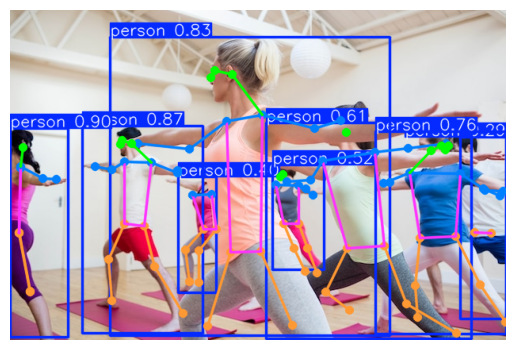

In [17]:
# Load a model
model = YOLO("yolov8n-pose.pt")

# Predict with the model
results = model("https://img.freepik.com/free-photo/group-people-performing-stretching-exercise_1170-116.jpg")

# Display the results
plot_results(results)

## Custom Object Detection 🏔️⛷️
Now that you have mastered the basics of object detection with YOLO, it's time to train your own model! You have been tasked by a ski resort in the Grisons mountain to develop a system that can detect and count the number of skiers on the ski slopes in real-time. The resort wants to use this information to optimize the number of ski lifts running and to improve the overall skier experience. Because of this, we need to train our custom YOLO model.

### Transfer learning
While you could train a model from scratch it is often much more efficient to use an existing model and fine-tune it on your own dataset. This process, where a model trained on one task is re-purposed on a second related task, is called transfer learning. Since the model has already learned to detect and classify objects in images, it can be relatively easily adapted to detect new objects, that it hasn't seen before. Transfer learning is widely used, because it uses much less training data, trains much faster and often achieves better performance than training a model from scratch.

### Dataset
In order to train our custom YOLO model, we need a dataset of labeled images with the objects we want to classify. This is what we call supervised learning. There are many datasets with thousands of images available online, that are already labeled and can be used. Some of them are generic, while others are application specific (e.g. medical imaging, aerial imaging, self-driving cars etc.). Here are two examples of popular datasets. The COCO dataset for example, that was used to train the original YOLO model, contains 80 classes of objects:
* https://cocodataset.org/#explore
* https://storage.googleapis.com/openimages/web/index.html

Take a minute to look at the website and see how the images are labelled. For this exercise however, we want to create our own dataset from scratch. Creating your own dataset can be a very time consuming process. Fortunately, there are a lot of images of skiers available online, that we can use for our model. 

### Synthetic data
Sometimes it can be difficult or tedious, to get enough images for training your model. This can have several reasons: Maybe you want to detect defects in a production line, that only occur very rarely. Or you want to detect



However for this exercise, we will be labelling the images ourselves. We start by searching for images of skiers on the internet. We then use a tool to label the images. There are many tools available for labeling images.


## Training our custom model
I have prepared a small dataset of images of skiers for you to use. Execute the code below to download the dataset:


In [ ]:
# Download training data
!wget https://github.com/Eagleshot/CustomYOLOV8Model/archive/refs/heads/main.zip --quiet
!unzip -q main.zip
!mv /content/CustomYOLOV8Model-main/ /content/datasets/ # Rename folder
PATH = "/content/datasets/"

Take a look at the dataset we downloaded. The data.yaml file describes the dataset and its location. Since we only have one class (nc = 1), we only need to specify the name of the class (skier).

```yaml
path: ./SkiDataset
train: images
val: images
test:

names: 
  0: skier
```

Now we look at the images and labels in the dataset. The images are stored in the images folder and the labels in the labels folder with the same name as the image. The labels for the bounding box are stored in the following format: class x_center y_center width height. The coordinates are normalized to the range [0, 1] and is therefore independent of the image size. Each line in the label file corresponds to one object in the image. As we only have one class, all objects begin with 0.

```txt
0 0.458187 0.537281 0.405458 0.425439
0 0.692593 0.161550 0.076998 0.130117
0 0.610721 0.155702 0.067251 0.165205
```
![label](https://github.com/ultralytics/docs/releases/download/0/two-persons-tie.avif)

To label images, you can use a tool to import the images, draw the bounding boxes and export the labels in the correct format. There are many tools available - I recommend using [makesense.ai](https://www.makesense.ai/), which is free and open-source tool.


When creating your own dataset, there are a few things you need to consider. 

Collect a wide variety of images from different angles, lighting etc. If you already know, that your model will be used in a specific environment, you should also try to collect images from that environment. This will make your model more robust and generalizable.

**Exercise:** Now its your turn - get some more images of skiers and label them. Put them into the dataset folder and do a train/test split. Label at least 20 images. If you want, you can share the labeled images with me.

**Exercise:** Now you can train the model using the code below. This will take a few minutes to run. While the model is training, look at the training folder in /runs/detect/train. A few files (labels.jpg, labels_correlogram.jpg, train_batch0.jpg etc.) have automatically been created there. Can you figure out what they are showing?


Data augmentation

In [ ]:
# Load a pretrained model for transfer learning
model = YOLO("yolov8n.pt")

# Train the model for 100 epochs
PATH = ""
results = model.train(data = "C:/Users/Noel/Desktop/CustomYOLOV8Model-1/data.yaml", epochs=100)

## Testing the model
Now you can import your newly trained model in order to test it. You can use it just like any other YOLO model. The model is saved in the `runs/train/trainX/weights/` directory. Make sure to replace `trainX` with the last training run you did or use the function below to get the latest model:

In [4]:
def getLastModelPath():
    # Get the path of the trained model
    path = f"{os.getcwd()}/runs/detect/"
    folders = os.listdir(path)
    train_folders = [folder for folder in folders if "train" in folder]
    last_train_folder = sorted(train_folders)[-1]
    model_path = f"{path}{last_train_folder}/weights/"
    print(f"Last train folder: {model_path}")
    return model_path

In [ ]:
model_path = getLastModelPath()

# Use newly trained model for inference
model = YOLO(f"{model_path}/best.pt")

# Test the model on an image
image_url = "https://www.graubuenden.ch/sites/graubuenden/files/styles/hero_xlarge_2x/public/2022-11/skifahren-davos-klosters-skigebiet-parsenn.jpg"
results = model(image_url)
plot_results(results)

As you can see, the new model should perform well on our test image and is able to detect our skiers.🥳

**Question:** Do you know why the model performs well with only these few images? Would it work as well with the same amount of images if we tested it on something different (e.g. a mountain climber)? Why or why not? Hint: Look at the training data of the original YOLO model.
<details>
    <summary>Click here to hide/unhide the answer!</summary>
    In the [COCO dataset](https://cocodataset.org/#explore) that was used to train the YOLO model, there are already many images of people and skis, so it is not very difficult for the model to recognize skiers. However, if you test it on completely new data, it might need a lot more trainint data.
</details>

**Question:** Can you test it on some additional images/videos (e.g. https://www.youtube.com/watch?v=B5xckyNsWKw)? How does it perform? What are the limitations of the model and how could you improve it?
<details>
    <summary>Click here to hide/unhide the answer!</summary>
  The model performs well on images/videos that are similar to the training data, however if you test it on images/videos that are very different from the training data, the performance is not very good. For example with a video from a ski race from the perspective of a drone/helicopter or with different lighting/weather, the skiers are not reliably recognized. In order to improve the model, its always good to have a diverse dataset with images from different perspectives, lighting conditions, etc. This way the model can generalize better and perform well on unseen data. Large datasets (e.g. the COCO dataset used to train YOLO) can contain tens of thousands of images, which takes a lot of effort. So generally speaking, you have to test the model and see how it performs on your specific use case and then decide if you need more data or not.
</details>

In [ ]:
# Test the model on a video
video_url = "https://www.youtube.com/watch?v=wDHMr_qUxNc"
results = model(video_url, stream_buffer=True)

## Deploying the model on hardware
TODO

![onnx](https://www.aurigait.com/wp-content/uploads/2023/01/unnamed-1.png)

In [ ]:
# Export model as ONNX
# https://docs.ultralytics.com/modes/export/#how-do-i-export-a-yolov8-model-to-onnx-format
onnx_model_path = model.export(format="onnx")